In [ ]:
import numpy as np
import pandas as pd
import os, cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


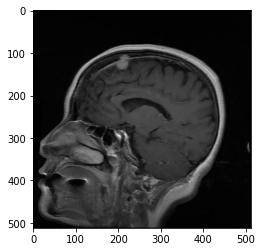

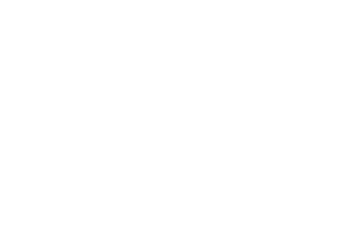

In [ ]:
# DATADIR = "D:/UMS/Semester 7/FYP2/Notebook/cnn/tumor/"
DATADIR ="/content/drive/MyDrive/cnn"
CATEGORIES = ["benign","malignant"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

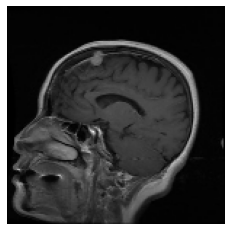

In [ ]:
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)

(2475, 150, 150)


In [ ]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y, num_classes = 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (1980, 150, 150, 1)
x_test shape (495, 150, 150, 1)
y_train shape (1980, 4)
y_test shape (495, 4)


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 30  
batch_size = 200
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  

In [ ]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/30
9/9 [==============================] - 4s 498ms/step - loss: 0.7690 - accuracy: 0.5640 - val_loss: 0.6826 - val_accuracy: 0.6788
Epoch 2/30
9/9 [==============================] - 3s 317ms/step - loss: 0.5931 - accuracy: 0.6629 - val_loss: 0.7582 - val_accuracy: 0.6949
Epoch 3/30
9/9 [==============================] - 3s 318ms/step - loss: 0.5780 - accuracy: 0.6663 - val_loss: 0.6281 - val_accuracy: 0.7010
Epoch 4/30
9/9 [==============================] - 3s 317ms/step - loss: 0.5675 - accuracy: 0.6775 - val_loss: 0.7775 - val_accuracy: 0.6323
Epoch 5/30
9/9 [==============================] - 3s 321ms/step - loss: 0.5461 - accuracy: 0.7062 - val_loss: 0.7915 - val_accuracy: 0.5919
Epoch 6/30
9/9 [==============================] - 3s 320ms/step - loss: 0.5461 - accuracy: 0.7017 - val_loss: 0.6798 - val_accuracy: 0.6485
Epoch 7/30
9/9 [==============================] - 3s 319ms/step - loss: 0.5206 - accuracy: 0.7371 - val_loss: 0.7269 - val_accuracy: 0.6040
Epoch 8/30
9/9 [====

In [ ]:
# Evaluate the model on test set
score = model.evaluate(X_val, Y_val, verbose=0)

# Print test accuracy
print('\n', 'validation accuracy:', score[1])


 validation accuracy: 0.8505050539970398


In [ ]:
labels =["Benign",  # index 0
        "Malignant",      # index 1
        ]

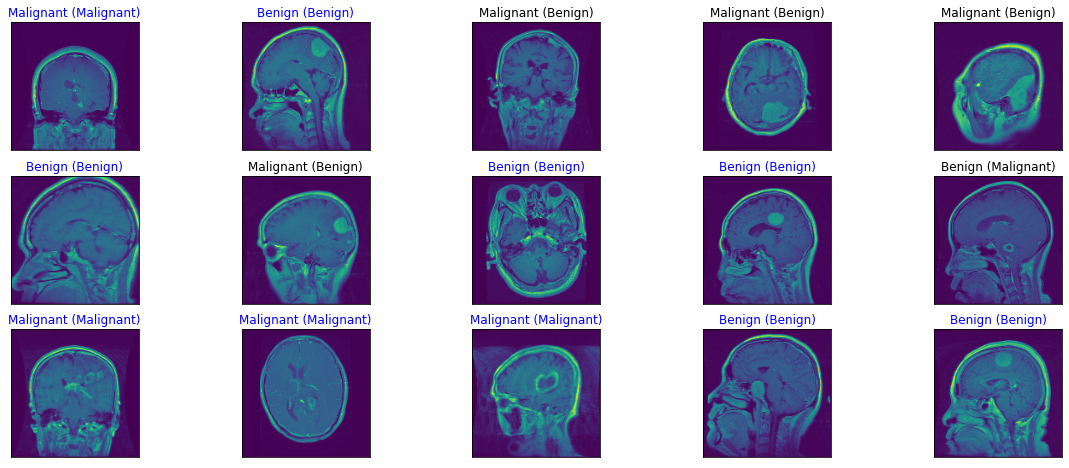

In [ ]:
y_hat = model.predict(X_val)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_val.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_val[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(Y_val[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("blue" if predict_index == true_index else "black"))
plt.show()

In [ ]:
model.save("ss.h5")

In [ ]:
from keras.models import load_model
loaded_model = load_model("ss.h5") 

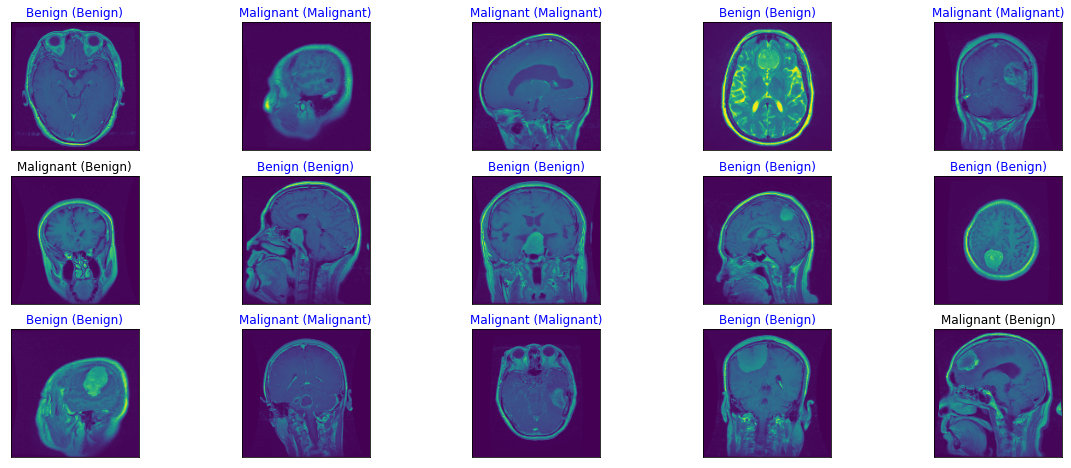

In [ ]:
y_hat = loaded_model.predict(X_val)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_val.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_val[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(Y_val[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("blue" if predict_index == true_index else "black"))
plt.show()